In [3]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Problématique: Etude d'impact des variables sur le revenu généré par le film**

In [4]:
# Charger la base de données
df=pd.read_csv('/content/drive/MyDrive/Kaggle/EDA/tmdb_movies_data.csv')

**Exploration des données**

In [5]:
# Affichage des 5 premières lignes
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [6]:
# Affichage des 5 dernières lignes
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [7]:
# Taille de la base de données
df.shape

(10866, 21)

In [8]:
# Informations des colonnes exemples :type de chaque variable , valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# Statistiques des variables numériques
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**1-Nettoyage des données**

In [10]:
# Nombre de lignes en doublon
df.duplicated().sum()

1

In [11]:
# Supprimer les doublons (inplace=True:pour appliquer à la base de données)
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# Découverte des valeurs manquantes
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# Afficher les colonnes
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [15]:
# Supprimer les colonnes qui n'ont pas d'impact sur l'étude
deleted_columns=['id', 'imdb_id', 'budget', 'revenue',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime','production_companies', 'release_date']
df.drop(deleted_columns , axis=1 , inplace=True)
df.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [16]:
# Découverte des valeurs manquantes
df.isnull().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [17]:
# Supprimer les valeurs manquantes
df.dropna(inplace=True)
df.shape

(10842, 8)

In [18]:
# Découverte des valeurs manquantes
df.isnull().sum()

popularity        0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [19]:
# Recodage de la colonne "genre" par "genre_adj" pour ne prendre que le premier genre sur la liste de genre
list_genre=[]
for i in df['genres']:
  i=i.split('|')
  list_genre.append(i[0])
df['genres_adj']=list_genre

In [20]:
df.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08,Action
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09,Action
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09,Action


**2 - Analyse exploratoire**

**a-Analyse univariée ( variable par variable )**

In [21]:
df['revenue_adj'].mean()

51477974.92242094

In [22]:
df['budget_adj'].mean()

17587121.438276574

In [23]:
df['vote_average'].mean()

5.974063825862405

In [24]:
df['genres_adj'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [25]:
df['genres_adj'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres_adj, dtype: int64

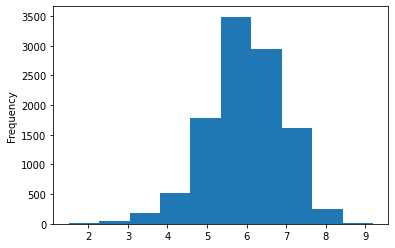

In [26]:
df['vote_average'].plot(kind='hist')

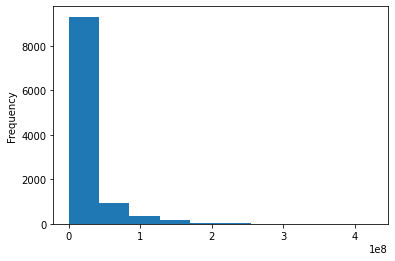

In [27]:
df['budget_adj'].plot(kind='hist')

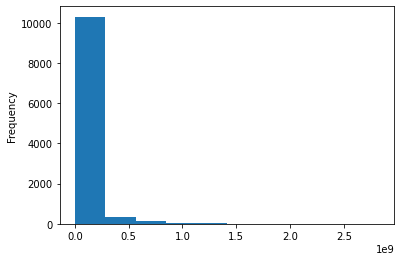

In [28]:
df['revenue_adj'].plot(kind='hist')

**b- Analyse bivariée ( entre deux variables)**

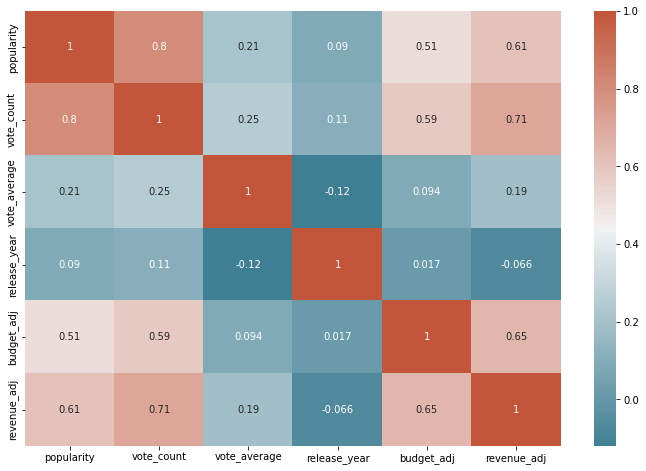

In [39]:
plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr , xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))

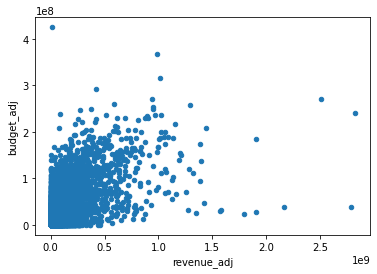

In [30]:
df.plot(kind='scatter', x='revenue_adj', y='budget_adj')

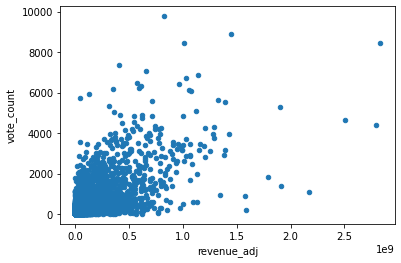

In [31]:
df.plot(kind='scatter', x='revenue_adj', y='vote_count')

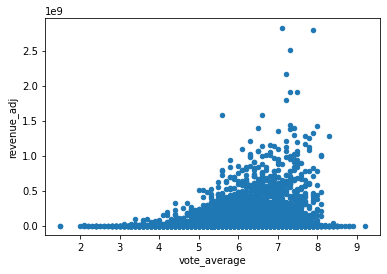

In [32]:
df.plot(kind='scatter', x='vote_average', y='revenue_adj')

**Q1: Quel genre de film génère un bon revenue ?**

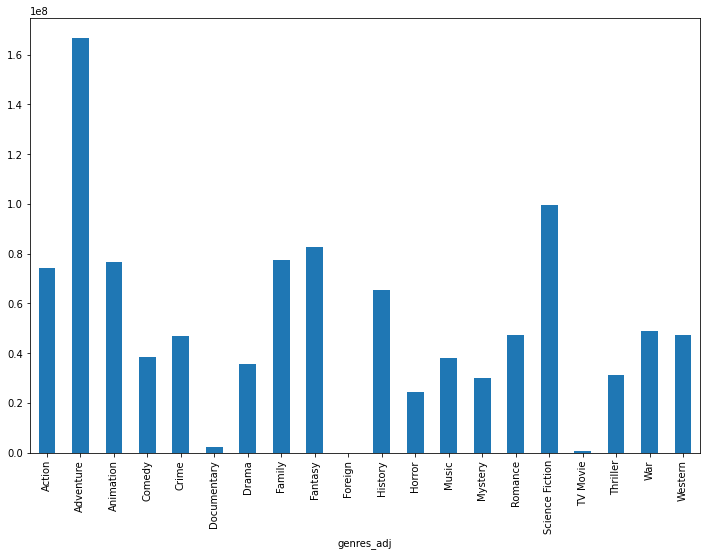

In [42]:
plt.figure(figsize=(12,8))
df_genre_revenue=df.groupby(['genres_adj'])['revenue_adj'].mean()
df_genre_revenue.plot(kind='bar')

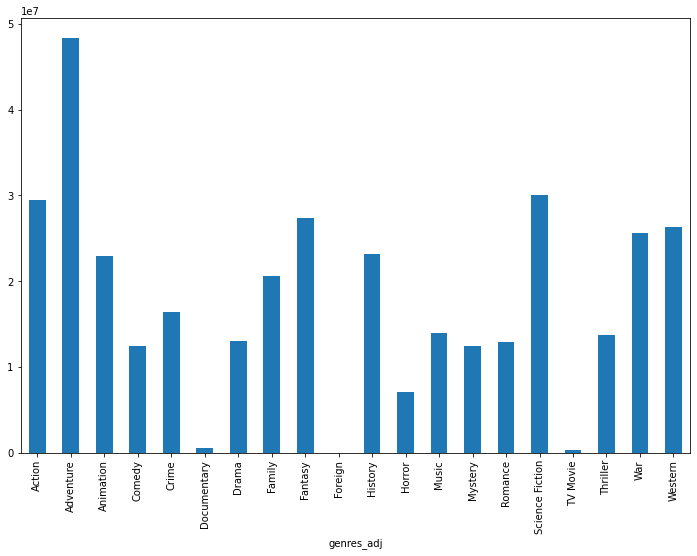

In [40]:
plt.figure(figsize=(12,8))
df_genre_budget=df.groupby(['genres_adj'])['budget_adj'].mean()
df_genre_budget.plot(kind='bar')

**Q2: Quelles sont les caractéristiques des films avec un très bon revenu**

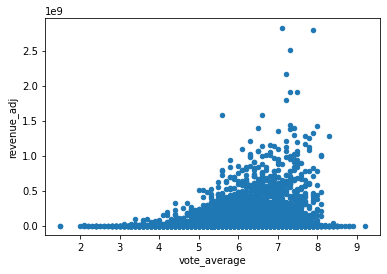

In [36]:
df.plot(kind='scatter', x='vote_average', y='revenue_adj')

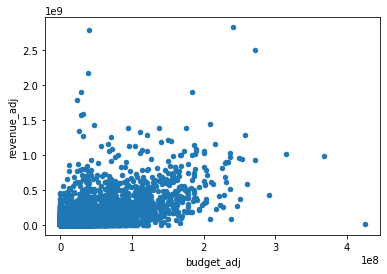

In [37]:
df.plot(kind='scatter',x='budget_adj',y='revenue_adj')

In [43]:
df

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,Action
...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00,Documentary
10862,0.065543,Grand Prix,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00,Action
10863,0.065141,Beregis Avtomobilya,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00,Mystery
10864,0.064317,"What's Up, Tiger Lily?",Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00,Action
